
<a id='arellano'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Default Risk and Income Fluctuations

## Colab Instructions

Colab does not have direct Julia support, and it must be installed each time you are working on a notebook.  

Instructions:

1. Ignore any errors about a missing kernel when loading the notebook.  Choose `Run Anyway` when it prompts that the notebook wasn't authored by google.

2. Run the cell below this with `Shift+Enter`.
    -  It will **5 to 8 minutes** the first time you run it for Julia and key packages to install

3. Refresh your browser, and then execute any code as normal.
  - Even after installation, there will be more precompiling latency for some packages. 

In [ ]:
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
    julia -e 'using Pkg; pkg"add IJulia InstantiateFromURL; precompile;"'
    julia -e 'using InstantiateFromURL; github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0", instantiate = true, precompile = false); using Plots, Distributions, Parameters, NLsolve, ForwardDiff, Expectations'
    echo 'Done'
fi


## Colab Instructions

Colab does not have direct Julia support, and it must be installed each time you are working on a notebook.  

Instructions:

1. Ignore any errors about a missing kernel when loading the notebook.  Choose `Run Anyway` when it prompts that the notebook wasn't authored by google.

2. Run the cell below this with `Shift+Enter`.
    -  It will **5 to 8 minutes** the first time you run it for Julia and key packages to install

3. Refresh your browser, and then execute any code as normal.
  - Even after installation, there will be more precompiling latency for some packages. 

In [ ]:
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
    julia -e 'using Pkg; pkg"add IJulia InstantiateFromURL; precompile;"'
    julia -e 'using InstantiateFromURL; github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0", instantiate = true, precompile = false); using Plots, Distributions, Parameters, NLsolve, ForwardDiff, Expectations'
    echo 'Done'
fi


## Contents

- [Default Risk and Income Fluctuations](#Default-Risk-and-Income-Fluctuations)  
  - [Overview](#Overview)  
  - [Structure](#Structure)  
  - [Equilibrium](#Equilibrium)  
  - [Computation](#Computation)  
  - [Results](#Results)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

This lecture computes versions of  Arellano’s  [[Are08]](../zreferences.html#arellano2008default) model of sovereign default.

The model describes interactions among default risk, output,  and  an equilibrium interest rate  that includes a premium for endogenous default risk.

The decision maker is a government of a small open economy that borrows from risk-neutral foreign creditors.

The foreign lenders must be compensated for default risk.

The government borrows and lends abroad in order to  smooth the consumption of its citizens.

The government repays its debt only if it wants to, but declining to pay has adverse consequences.

The interest rate on government debt adjusts in response to the state-dependent default probability chosen by government.

The model yields outcomes that help interpret sovereign default experiences, including

- countercyclical interest rates on sovereign debt  
- countercyclical trade balances  
- high volatility of consumption relative to output  


Notably, long recessions caused by bad draws in the income process increase the government’s incentive to default.

This can lead to

- spikes in interest rates  
- temporary losses of access to international credit markets  
- large drops in output, consumption, and welfare  
- large capital outflows during recessions  


Such dynamics are consistent with experiences of many countries.

## Structure

In this section we describe the main features of the model.

### Output, Consumption and Debt

A small open economy is endowed with an exogenous stochastically fluctuating potential output stream $ \{y_t\} $.

Potential output is realized only in periods in which the government honors its sovereign debt.

The output good can be traded or consumed.

The sequence $ \{y_t\} $ is described by a Markov process with stochastic density kernel $ p(y, y') $.

Households within the country are identical and rank stochastic consumption streams according to


<a id='equation-utility'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t u(c_t) \tag{1}
$$

Here

- $ 0 < \beta < 1 $ is a time discount factor.  
- $ u $ is an increasing and strictly concave utility function.  


Consumption sequences enjoyed by households are affected by the government’s decision to borrow or lend internationally.

The government is benevolent in the sense that its aim is to maximize [(1)](#equation-utility).

The government is the only domestic actor with access to foreign credit.

Because household are averse to consumption fluctuations, the government will try to smooth consumption by borrowing from (and lending to) foreign creditors.

### Asset Markets

The only credit instrument available to the government is a one-period bond traded in international credit markets.

The bond market has the following features

- The bond matures in one period and is not state contingent.  
- A purchase of a bond with face value $ B' $ is a claim to $ B' $ units of the
  consumption good next period.  
- To purchase $ B' $  next period costs $ q B' $ now, or, what is equivalent.  
- For selling $ -B' $ units of next period goods the seller earns $ - q B' $ of today’s goods  
  
  - if $ B' < 0 $, then $ -q B' $ units of the good are received in the current period, for a promise to repay $ -B' $ units next period  
  - there is an equilibrium  price function $ q(B', y) $ that makes $ q $ depend on both $ B' $ and $ y $  
  


Earnings on the government portfolio are distributed (or, if negative, taxed) lump sum to households.

When the government is not excluded from financial markets, the one-period national budget constraint is


<a id='equation-resource'></a>
$$
c = y + B - q(B', y) B' \tag{2}
$$

Here and below, a prime denotes a next period value or a claim maturing next period.

To rule out Ponzi schemes, we also require that $ B \geq -Z $ in every period.

- $ Z $ is chosen to be sufficiently large that the constraint never binds in equilibrium.  

### Financial Markets

Foreign creditors

- are risk neutral  
- know the domestic output stochastic process $ \{y_t\} $ and observe $ y_t, y_{t-1}, \ldots, $ at time $ t $  
- can borrow or lend without limit in an international credit market at a constant international interest rate $ r $  
- receive full payment if the government chooses to pay  
- receive zero if the government defaults on its one-period debt due  


When a government is expected to default next period with  probability $ \delta $,  the expected value of a promise to pay one unit of consumption next period is $ 1 - \delta $.

Therefore, the discounted expected value of a promise to pay $ B $ next period is


<a id='equation-epc'></a>
$$
q = \frac{1 - \delta}{1 + r} \tag{3}
$$

Next we turn to how the government in effect chooses the default probability $ \delta $.

### Government’s decisions

At each point in time $ t $, the government chooses between

1. defaulting  
1. meeting its current obligations and purchasing or selling an optimal quantity of  one-period sovereign debt  


Defaulting means declining to repay all of  its current obligations.

If the government defaults in the current period, then consumption equals current output.

But a sovereign default has two consequences:

1. Output immediately falls from $ y $ to $ h(y) $, where $ 0 \leq h(y) \leq y $  
  
  - it returns to $ y $ only after the country regains access to  international credit markets.  
  
1. The country loses access to foreign credit markets.  

### Reentering international credit market

While in a state of default, the economy regains access to
foreign credit in each subsequent period with probability
$ \theta $.

## Equilibrium

Informally, an equilibrium is a sequence of interest rates on its sovereign debt, a stochastic sequence of government default decisions  and an implied flow of household consumption such that

1. Consumption and assets satisfy the national budget constraint.  
1. The government maximizes household utility taking into account  
  - the resource constraint  
  - the effect of its choices on the price of bonds  
  - consequences of defaulting now for future net output and future borrowing and lending opportunities  
1. The interest rate on the government’s debt includes a risk-premium sufficient to make foreign creditors expect on average to earn the constant risk-free international interest rate.  


To express these ideas more precisely, consider first the choices of the
government, which

1. enters a period with initial assets $ B $, or  what is the same thing, initial debt to be repaid now of $ -B $  
1. observes current output $ y $, and  
1. chooses either  
  
  1. to default, or  
  1. to pay  $ -B $ and set next period’s debt due to $ -B' $  
  


In a  recursive formulation,

- state variables for the government comprise the pair $ (B, y) $  
- $ v(B, y) $ is the optimum value of the government’s problem when at the beginning of a period  it faces the choice of whether to honor or default  
- $ v_c(B, y) $ is the value of choosing to pay obligations falling due  
- $ v_d(y) $ is the value of choosing to default  


$ v_d(y) $ does not depend on $ B $ because, when access to credit is eventually regained, net foreign assets equal $ 0 $.

Expressed recursively, the value of defaulting is

$$
v_d(y) = u(h(y)) +
    \beta \int \left\{
            \theta v(0, y') + (1 - \theta) v_d(y')
            \right\}
            p(y, y') dy'
$$

The value of paying is

$$
v_c(B, y) = \max_{B' \geq -Z}
       \left\{
            u(y - q(B', y) B' + B) +
            \beta \int v(B', y') p(y, y') dy'
      \right\}
$$

The three value functions are linked by

$$
v(B, y) = \max\{ v_c(B, y), v_d(y) \}
$$

The government chooses to default when

$$
v_c(B, y) < v_d(y)
$$

and hence given $ B' $ the probability of default next period  is


<a id='equation-delta'></a>
$$
\delta(B', y) := \int \mathbb 1\{v_c(B', y') < v_d(y') \} p(y, y') dy' \tag{4}
$$

Given zero profits for foreign creditors in equilibrium, we can combine [(3)](#equation-epc) and [(4)](#equation-delta) to pin down
the bond price function:


<a id='equation-bondprice'></a>
$$
q(B', y) = \frac{1 - \delta(B', y)}{1 + r} \tag{5}
$$

### Definition of equilibrium

An *equilibrium* is

- a  pricing function $ q(B',y) $,  
- a triple of value functions $ (v_c(B, y), v_d(y), v(B,y)) $,  
- a decision rule telling the government when to default and when to pay as a function of the state  $ (B, y) $, and  
- an asset accumulation rule that, conditional on choosing not to  default,  maps $ (B,y) $ into $ B' $  


such that

- The three Bellman equations for $ (v_c(B, y), v_d(y), v(B,y)) $ are satisfied.  
- Given the price function $ q(B',y) $, the default decision rule and the asset accumulation decision rule attain the optimal value function  $ v(B,y) $, and  
- The price function $ q(B',y) $ satisfies equation [(5)](#equation-bondprice).  

## Computation

Let’s now compute an equilibrium of Arellano’s model.

The equilibrium objects are the value function $ v(B, y) $, the associated default decision rule, and the pricing function $ q(B', y) $.

We’ll use our code to replicate Arellano’s results.

After that we’ll perform some additional simulations.

It uses a slightly modified version of the algorithm recommended by Arellano.

- The appendix to [[Are08]](../zreferences.html#arellano2008default) recommends
  value function iteration until convergence, updating the price, and then repeating.  
- Instead, we update the bond price at every value function iteration step.  


The second approach is faster and the two different procedures deliver very similar results.

Here is a more detailed description of our algorithm:

1. Guess a value function $ v(B, y) $ and price function $ q(B', y) $.  
1. At each pair $ (B, y) $,  
  - update the value of defaulting $ v_d(y) $  
  - update the value of continuing $ v_c(B, y) $  
1. Update the value function v(B, y), the default rule,  the implied ex ante default probability,  and the price function.  
1. Check for convergence. If converged, stop. If not, go to step 2.  


We use simple discretization on a grid of asset holdings and income levels.

The output process is discretized using [Tauchen’s quadrature method](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/markov/markov_approx.jl).

The code can be found below:

(Results and discussion follow the code)

### Setup

In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.7.0")

In [2]:
using LinearAlgebra, Statistics
using Parameters, QuantEcon, DataFrames, Plots, Random

In [3]:
function ArellanoEconomy(;β = .953,
                          γ = 2.,
                          r = 0.017,
                          ρ = 0.945,
                          η = 0.025,
                          θ = 0.282,
                          ny = 21,
                          nB = 251)

    # create grids
    Bgrid = collect(range(-.4, .4, length = nB))
    mc = tauchen(ny, ρ, η)
    Π = mc.p
    ygrid = exp.(mc.state_values)
    ydefgrid = min.(.969 * mean(ygrid), ygrid)

    # define value functions
    # notice ordered different than Python to take
    # advantage of column major layout of Julia)
    vf = zeros(nB, ny)
    vd = zeros(1, ny)
    vc = zeros(nB, ny)
    policy = zeros(nB, ny)
    q = ones(nB, ny) .* (1 / (1 + r))
    defprob = zeros(nB, ny)

    return (β = β, γ = γ, r = r, ρ = ρ, η = η, θ = θ, ny = ny,
            nB = nB, ygrid = ygrid, ydefgrid = ydefgrid,
            Bgrid = Bgrid, Π = Π, vf = vf, vd = vd, vc = vc,
            policy = policy, q = q, defprob = defprob)
end

u(ae, c) = c^(1 - ae.γ) / (1 - ae.γ)

function one_step_update!(ae,
                          EV,
                          EVd,
                          EVc)

    # unpack stuff
    @unpack β, γ, r, ρ, η, θ, ny, nB = ae
    @unpack ygrid, ydefgrid, Bgrid, Π, vf, vd, vc, policy, q, defprob = ae
    zero_ind = searchsortedfirst(Bgrid, 0.)

    for iy in 1:ny
        y = ae.ygrid[iy]
        ydef = ae.ydefgrid[iy]

        # value of being in default with income y
        defval = u(ae, ydef) + β * (θ * EVc[zero_ind, iy] + (1-θ) * EVd[1, iy])
        ae.vd[1, iy] = defval

        for ib in 1:nB
            B = ae.Bgrid[ib]

            current_max = -1e14
            pol_ind = 0
            for ib_next=1:nB
                c = max(y - ae.q[ib_next, iy]*Bgrid[ib_next] + B, 1e-14)
                m = u(ae, c) + β * EV[ib_next, iy]

                if m > current_max
                    current_max = m
                    pol_ind = ib_next
                end

            end

            # update value and policy functions
            ae.vc[ib, iy] = current_max
            ae.policy[ib, iy] = pol_ind
            ae.vf[ib, iy] = defval > current_max ? defval : current_max
        end
    end
end

function compute_prices!(ae)
    # unpack parameters
    @unpack β, γ, r, ρ, η, θ, ny, nB = ae

    # create default values with a matching size
    vd_compat = repeat(ae.vd, nB)
    default_states = vd_compat .> ae.vc

    # update default probabilities and prices
    copyto!(ae.defprob, default_states * ae.Π')
    copyto!(ae.q, (1 .- ae.defprob) / (1 + r))
    return
end

function vfi!(ae; tol = 1e-8, maxit = 10000)

    # unpack stuff
    @unpack β, γ, r, ρ, η, θ, ny, nB = ae
    @unpack ygrid, ydefgrid, Bgrid, Π, vf, vd, vc, policy, q, defprob = ae
    Πt = Π'

    # Iteration stuff
    it = 0
    dist = 10.

    # allocate memory for update
    V_upd = similar(ae.vf)

    while dist > tol && it < maxit
        it += 1

        # compute expectations for this iterations
        # (we need Π' because of order value function dimensions)
        copyto!(V_upd, ae.vf)
        EV = ae.vf * Πt
        EVd = ae.vd * Πt
        EVc = ae.vc * Πt

        # update value function
        one_step_update!(ae, EV, EVd, EVc)

        # update prices
        compute_prices!(ae)

        dist = maximum(abs(x - y) for (x, y) in zip(V_upd, ae.vf))

        if it % 25 == 0
            println("Finished iteration $(it) with dist of $(dist)")
        end
    end
end

function QuantEcon.simulate(ae,
                            capT = 5000;
                            y_init = mean(ae.ygrid),
                            B_init = mean(ae.Bgrid),
                            )

    # get initial indices
    zero_index = searchsortedfirst(ae.Bgrid, 0.)
    y_init_ind = searchsortedfirst(ae.ygrid, y_init)
    B_init_ind = searchsortedfirst(ae.Bgrid, B_init)

    # create a QE MarkovChain
    mc = MarkovChain(ae.Π)
    y_sim_indices = simulate(mc, capT + 1; init = y_init_ind)

    # allocate and fill output
    y_sim_val = zeros(capT+1)
    B_sim_val, q_sim_val = similar(y_sim_val), similar(y_sim_val)
    B_sim_indices = fill(0, capT + 1)
    default_status = fill(false, capT + 1)
    B_sim_indices[1], default_status[1] = B_init_ind, false
    y_sim_val[1], B_sim_val[1] = ae.ygrid[y_init_ind], ae.Bgrid[B_init_ind]

    for t in 1:capT
        # get today's indexes
        yi, Bi = y_sim_indices[t], B_sim_indices[t]
        defstat = default_status[t]

        # if you are not in default
        if !defstat
            default_today = ae.vc[Bi, yi] < ae.vd[yi]

            if default_today
                # default values
                default_status[t] = true
                default_status[t + 1] = true
                y_sim_val[t] = ae.ydefgrid[y_sim_indices[t]]
                B_sim_indices[t + 1] = zero_index
                B_sim_val[t+1] = 0.
                q_sim_val[t] = ae.q[zero_index, y_sim_indices[t]]
            else
                default_status[t] = false
                y_sim_val[t] = ae.ygrid[y_sim_indices[t]]
                B_sim_indices[t + 1] = ae.policy[Bi, yi]
                B_sim_val[t + 1] = ae.Bgrid[B_sim_indices[t + 1]]
                q_sim_val[t] = ae.q[B_sim_indices[t + 1], y_sim_indices[t]]
            end

        # if you are in default
        else
            B_sim_indices[t + 1] = zero_index
            B_sim_val[t+1] = 0.
            y_sim_val[t] = ae.ydefgrid[y_sim_indices[t]]
            q_sim_val[t] = ae.q[zero_index, y_sim_indices[t]]

            # with probability θ exit default status
            default_status[t + 1] = rand() ≥ ae.θ
        end
    end

    return (y_sim_val[1:capT], B_sim_val[1:capT], q_sim_val[1:capT],
            default_status[1:capT])
end

## Results

Let’s start by trying to replicate the results obtained in [[Are08]](../zreferences.html#arellano2008default).

In what follows, all results are computed using Arellano’s parameter values.

The values can be seen in the function ArellanoEconomy shown above.

- For example, r=0.017 matches the average quarterly rate on a 5 year US treasury
  over the period 1983–2001.  


Details on how to compute the figures are reported as solutions to the exercises.

The first figure shows the bond price schedule and replicates Figure 3 of Arellano, where $ y_L $ and $ Y_H $ are particular below average and above average values of output $ y $

<img src="_static/figures/arellano_bond_prices.png" style="">

  
- $ y_L $ is 5% below the mean of the $ y $ grid values  
- $ y_H $ is 5% above  the mean of the $ y $ grid values  


The grid used to compute this figure was relatively coarse (ny, nB = 21, 251) in order to match Arrelano’s findings.

Here’s the same relationships computed on a finer grid (ny, nB = 51, 551)

<img src="_static/figures/arellano_bond_prices_2.png" style="">

  
In either case, the figure shows that

- Higher levels of debt (larger $ -B' $) induce larger discounts on the face value, which correspond to  higher interest rates.  
- Lower income also causes more discounting, as foreign creditors anticipate greater likelihood of default.  


The next figure plots value functions and replicates the right hand panel of Figure 4 of [[Are08]](../zreferences.html#arellano2008default)

<img src="_static/figures/arellano_value_funcs.png" style="">

  
We can use the results of the computation to study the default probability
$ \delta(B', y) $ defined in [(4)](#equation-delta).

The next plot shows these default probabilities over $ (B', y) $ as a heat
map

<img src="_static/figures/arellano_default_probs.png" style="">

  
As anticipated, the probability that the government chooses to default in the
following period increases with indebtedness and falls with income.

Next let’s run a time series simulation of $ \{y_t\} $, $ \{B_t\} $ and $ q(B_{t+1}, y_t) $.

The grey vertical bars correspond to periods when the economy is excluded from financial markets because of a past default

<img src="_static/figures/arellano_time_series.png" style="">

  
One notable feature of the simulated data is the nonlinear response of interest rates.

Periods of relative stability are followed by sharp spikes in the discount rate on government debt.

## Exercises


<a id='arellano-ex1'></a>

### Exercise 1

To the extent that you can, replicate the figures shown above

- Use the parameter values listed as defaults in the function ArellanoEconomy.  
- The time series will of course vary depending on the shock draws.  

## Solutions

In [4]:
using DataFrames, Plots
gr(fmt=:png);

Compute the value function, policy and equilibrium prices

In [5]:
ae = ArellanoEconomy(β = .953,     # time discount rate
                     γ = 2.,       # risk aversion
                     r = 0.017,    # international interest rate
                     ρ = .945,     # persistence in output
                     η = 0.025,    # st dev of output shock
                     θ = 0.282,    # prob of regaining access
                     ny = 21,      # number of points in y grid
                     nB = 251)     # number of points in B grid

# now solve the model on the grid.
vfi!(ae)

Finished iteration 25 with dist of 0.3424484168091375


Finished iteration 50 with dist of 0.09820394074288075


Finished iteration 75 with dist of 0.02915866229151476


Finished iteration 100 with dist of 0.008729266837651295


Finished iteration 125 with dist of 0.002618400938121823


Finished iteration 150 with dist of 0.0007857709211727126


Finished iteration 175 with dist of 0.00023583246008485048


Finished iteration 200 with dist of 7.078195654131036e-5


Finished iteration 225 with dist of 2.1244388765495614e-5


Finished iteration 250 with dist of 6.376267926100354e-6


Finished iteration 275 with dist of 1.913766855210497e-6


Finished iteration 300 with dist of 5.743961786208729e-7


Finished iteration 325 with dist of 1.723987352875156e-7


Finished iteration 350 with dist of 5.174360495630026e-8


Finished iteration 375 with dist of 1.5530289942944364e-8


Compute the bond price schedule as seen in figure 3 of Arellano (2008)

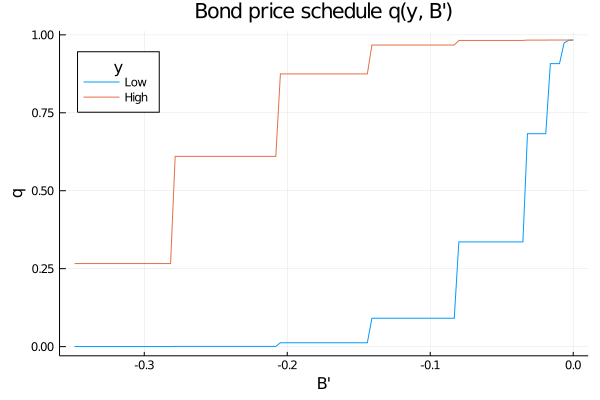

In [6]:
# create "Y High" and "Y Low" values as 5% devs from mean
high, low = 1.05 * mean(ae.ygrid), 0.95 * mean(ae.ygrid)
iy_high, iy_low = map(x -> searchsortedfirst(ae.ygrid, x), (high, low))

# extract a suitable plot grid
x = zeros(0)
q_low = zeros(0)
q_high = zeros(0)
for i in 1:ae.nB
    b = ae.Bgrid[i]
    if -0.35 ≤ b ≤ 0  # to match fig 3 of Arellano
        push!(x, b)
        push!(q_low, ae.q[i, iy_low])
        push!(q_high, ae.q[i, iy_high])
    end
end

# generate plot
plot(x, q_low, label = "Low")
plot!(x, q_high, label = "High")
plot!(title = "Bond price schedule q(y, B')",
      xlabel = "B'", ylabel = "q", legend_title = "y", legend = :topleft)

Draw a plot of the value functions

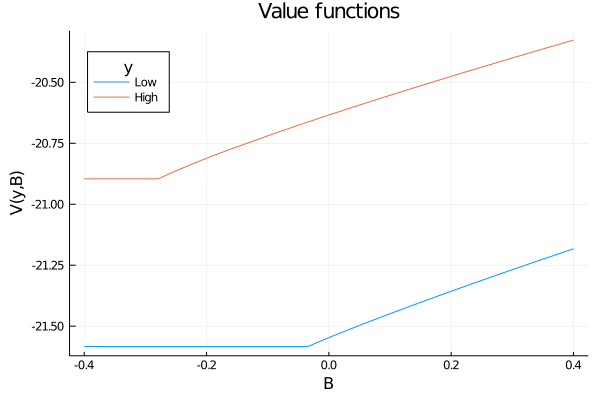

In [7]:
plot(ae.Bgrid, ae.vf[:, iy_low], label = "Low")
plot!(ae.Bgrid, ae.vf[:, iy_high], label = "High")
plot!(xlabel = "B", ylabel = "V(y,B)", title = "Value functions",
      legend_title="y", legend = :topleft)

Draw a heat map for default probability

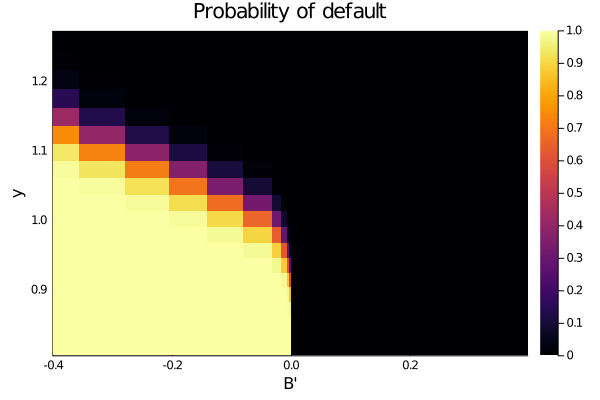

In [8]:
heatmap(ae.Bgrid[1:end-1],
    ae.ygrid[2:end],
    reshape(clamp.(vec(ae.defprob[1:end - 1, 1:end - 1]), 0, 1), 250, 20)')
plot!(xlabel = "B'", ylabel = "y", title = "Probability of default",
    legend = :topleft)

Plot a time series of major variables simulated from the model

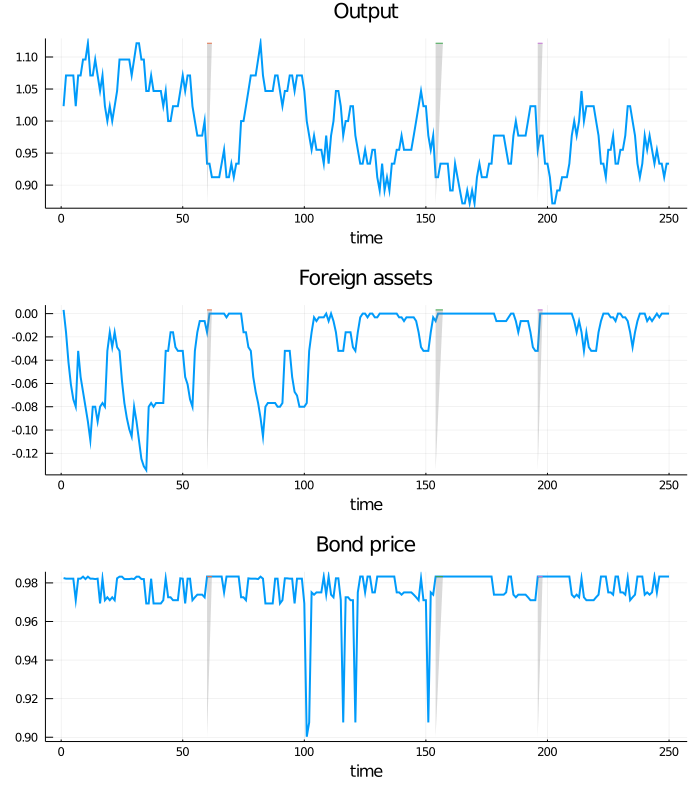

In [9]:
using Random
# set random seed for consistent result
Random.seed!(348938)

# simulate
T = 250
y_vec, B_vec, q_vec, default_vec = simulate(ae, T)

# find starting and ending periods of recessions
defs = findall(default_vec)
def_breaks = diff(defs) .> 1
def_start = defs[[true; def_breaks]]
def_end = defs[[def_breaks; true]]

y_vals = [y_vec, B_vec, q_vec]
titles = ["Output", "Foreign assets", "Bond price"]

plots = plot(layout = (3, 1), size = (700, 800))

# Plot the three variables, and for each each variable shading the period(s) of default
# in grey
for i in 1:3
    plot!(plots[i], 1:T, y_vals[i], title = titles[i], xlabel = "time", label = "", lw = 2)
    for j in 1:length(def_start)
        plot!(plots[i], [def_start[j], def_end[j]], fill(maximum(y_vals[i]), 2),
              fillrange = [extrema(y_vals[i])...], fcolor = :grey, falpha = 0.3, label = "")
    end
end

plot(plots)